# Periodické přemnožování obaleče


In [2]:
import matplotlib.pyplot as plt        # knihovna pro statické grafy a grafy kreslit sem do zápisníku
%matplotlib inline               

import numpy                           # knihovna pro numerické výpočty
from scipy.integrate import solve_ivp  # řešení diferenciálních rovnic

Následující model je model obaleče *Choristoneura fumiferana*, který periodicky atakuje lesy severní Ameriky. Jeho populace je relativně malá, ale některé roky se velikost populace zvýší tisícinásobně a dokáže zahubit
$80\%$ stromů v lese a prakticky zničit les.  Model byl publikován v _D. Ludwig, D.D. Jones and C.S. Holling, Qualitative analysis of insect outbreak systems: the spruce budworm and forest, Journal of Animal Ecology 47(1): 315–332, February 1978_. Sestavili jej dva matematikové (Ludwig a Jones) a jeden ekolog (Holling), aby nahradili starý počítačový model Canadian Forestry Service, který používal **30 654 proměnných** spojených diferenčními rovnicemi. Nový model pracoval jenom se třemi rovnicemi. 
Zde jsme představíme zjednodušenou verzi o jediné rovnici. Princip zjednodušení je v úvaze, že dynamika hmyzu je mnohem rychlejší než dynamika lesa a při sledování pouze populace hmyzu si můžeme dovolit považovat parametry lesa za konstantní. Matematikové mluví o kvazistacionárním přiblížení. Plný model kromě dobrých výsledků podal i objasnění příčiny náhlého masového přemnožení obaleče, ke kterému docházelo přibližně vždy po 35 letech. Původní počítačový model dokázal pouze počítat simulace.

## Matematický model

Zde představený model je jeden z klasických modelů popsaných v mnoha učebnicích. Můžeme vycházet například z knihy  [Brauer, Kribs, Dynamical systems for biological modelling](https://katalog.mendelu.cz/documents/223086?back=https%3A%2F%2Fkatalog.mendelu.cz%2Fsearch%3Ftype%3Dglobal%26q%3DDYNAMICAL%2BSYSTEMS%2BFOR%2BBIOLOGICAL%2BMODELING&group=223086,175427,175821), plný text je pro uživatele MENDELU zdarma. 

Populaci obaleče je možno modelovat logistickou rovnicí $$\frac{\mathrm dx}{\mathrm dt}=rx\left(1-\frac xK\right)-H\frac{x^2}{x^2+A^2},$$
kde druhý člen na pravé straně charakterizuje vliv predátorů. Jedná se o funkci, která zpomaluje růst, podobně jako lov v [modelu s populací vystavené konstantnímu lovu](http://user.mendelu.cz/marik/aromamath/Lov_populace.html). Protože však predátoři mají určitou hodnotu, nad kterou jsou saturovaní a nestačí brzdit růst populace, je tato funkce ohraničená. Platí $$H\frac{x^2}{x^2+A^2}  \leq H.$$ To má dalekosáhlé důsledky.
Pro určité hodnoty parametrů může mít pravá strana rovnice pro $x>0$ jeden nebo tři nulové body. Abychom to pěkně viděli i s reálými dopady, nejprve si model zjednodušíme a poté vyřešíme prorůzné hodnoty parametrů.

## Nondimenzionalizace

Pro jednodušší kvalitativní analýza modelu snížíme počet parametrů. Například zvolíme jednotku veličiny $y$ tak, aby koeficient $A$ byl roven jedné, zvolíme jednotku času tak, aby koeficient $H$ byl roven jedné a vytkneme proměnnou $x$. Model má potom tvar
$$\frac{\mathrm dx}{\mathrm dt}=x\left [ r\left(1-\frac xK\right)-\frac{x}{x^2+1}\right].$$ Na pravé straně v hranaté závorce zůstává rozdíl funkce $\frac{x}{x^2+1}$ neobsahující žádný parametr a lineární funkce, se kterou snadno dokážeme manipulovat. 
Tento model je možné také zapsat ve tvaru 
$$\frac {\frac{\mathrm dx}{\mathrm dt}}{x}=r\left(1-\frac xK\right)-\frac{x}{x^2+1}$$
a výraz na pravé straně, podíl rychlosti růstu a velikosti růstu, interpretujeme jako relativní rychlost růstu.


## Numerický model

Nakreslíme křivky definované pravými stranami a řešení diferenciální rovnice pro různé počáteční podmínky




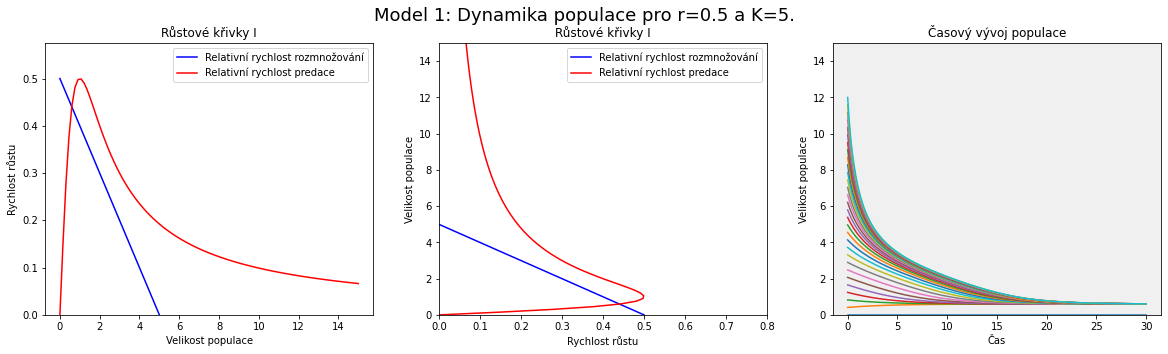

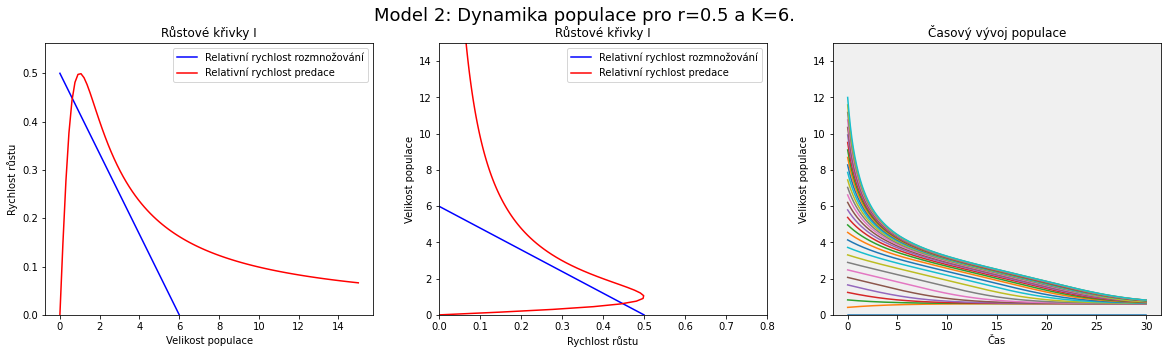

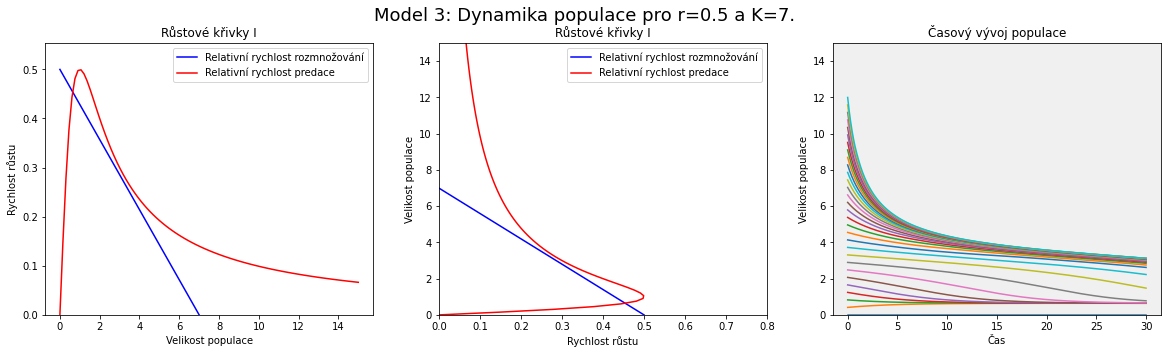

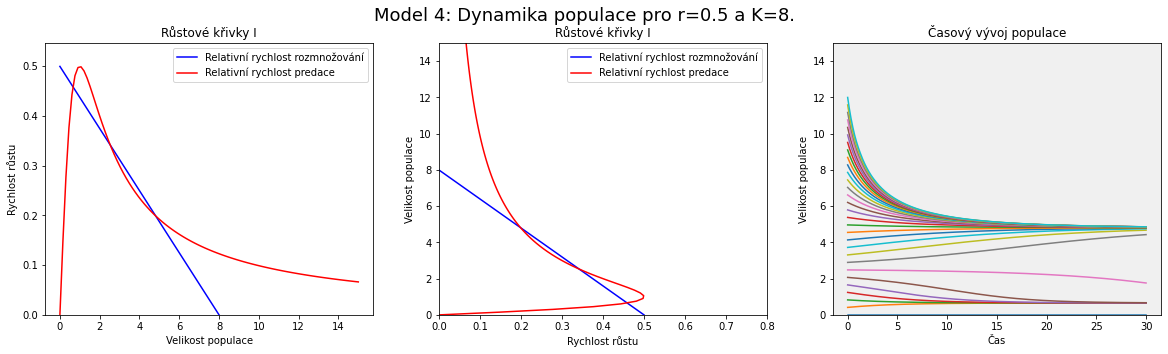

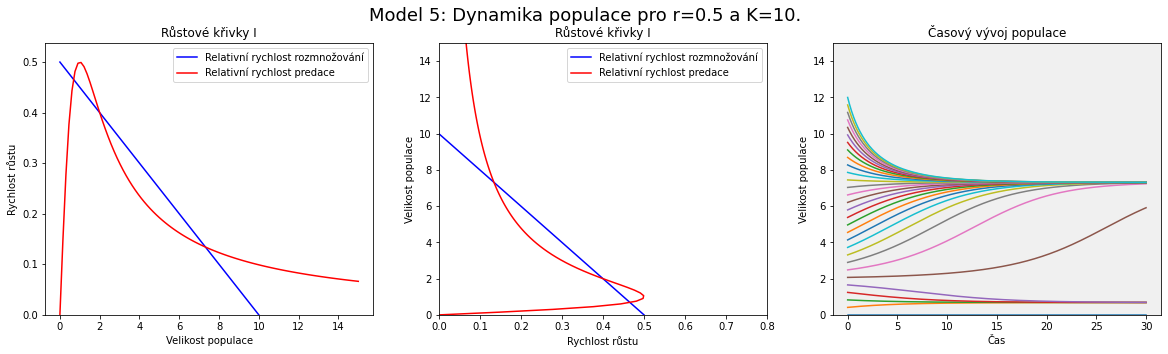

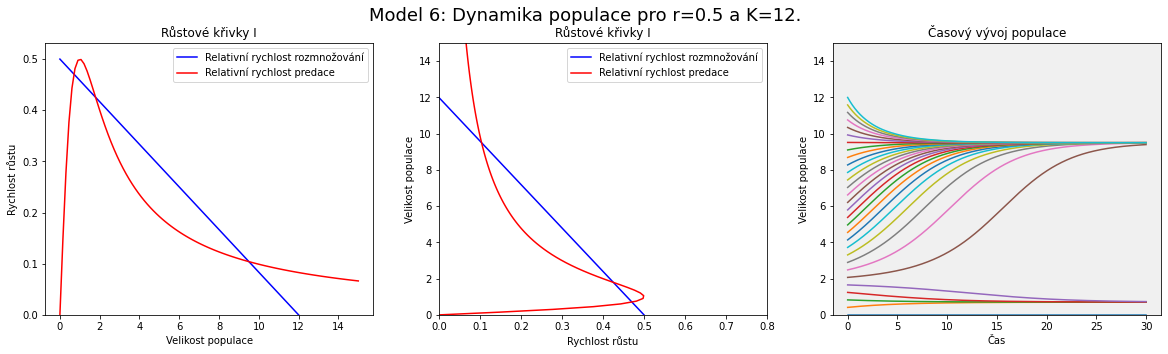

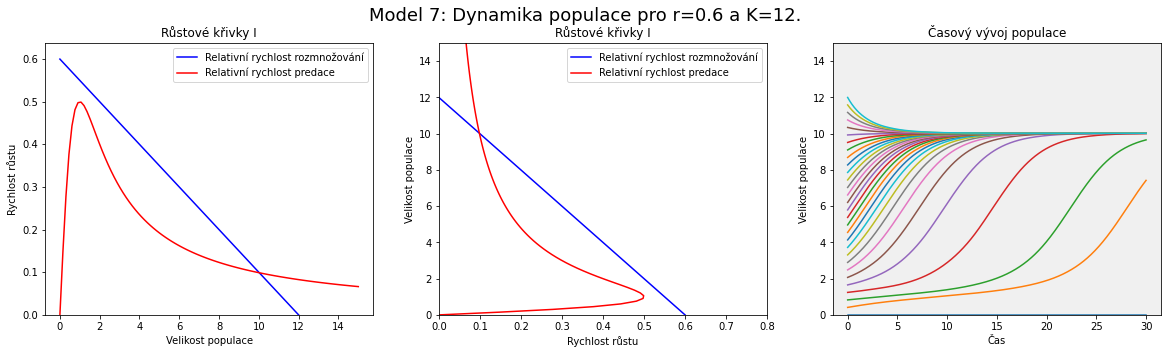

In [15]:
xmax = 15
tspan = numpy.linspace(0, 30, 1000)
xspan = numpy.linspace(0, xmax, 100)
x = xspan
count=0

# nastavení parametrů, pro které budeme počítat model
# uspořádané dvojice [r,K]
parametry = [ [0.5,5] , [0.5, 6], [0.5, 7], [0.5, 8], [0.5,10], [0.5,12], [0.6,12] ] 

for par in parametry:                               # cyklus přes různé hodnoty parametrů
    fig, axes = plt.subplots(1, 3, figsize=(20,5))  # inicializace a nastavení obrázku, kreslíme tři obrázky vedle sebe
    count = count + 1
    fig.suptitle('Model %s: Dynamika populace pro r=%s a K=%s.'%(count,par[0],par[1]), fontsize=18)
    
    r, K = par
    ax = axes[0]                            # kreslíme do prvního obrázku
    ax.plot(x,r*(1-x/K),color='blue', label='Relativní rychlost rozmnožování')         # přímka, růst popualce
    ax.plot(x,x/(1+x**2), color='red', label='Relativní rychlost predace')      # působení predátorů
    ax.set_ylim([0,None])                   # osa od nuly
    ax.set_title("Růstové křivky I")
    ax.set_xlabel("Velikost populace")
    ax.set_ylabel("Rychlost růstu")
    ax.legend(loc="upper right")

    ax = axes[1]                            # kreslíme do druhého obrázku
    ax.set_ylim([0,xmax])                   # nastavení rozsahu pro svislou osu
    ax.set_xlim([0,0.8])                    # nastavení rozsahu pro vodorovnou osu
    ax.plot(r*(1-x/K),x, color='blue', label='Relativní rychlost rozmnožování')        # přímka v soustavě souřadnic se svislou osou x
    ax.plot(x/(1+x**2),x, color='red', label='Relativní rychlost predace')      # působení predátorů v soustavě souřadnic se svislou osou x
    ax.set_title("Růstové křivky I")
    ax.set_ylabel("Velikost populace")
    ax.set_xlabel("Rychlost růstu")
    ax.legend(loc="upper right")


    ax = axes[2]                  # kreslíme do třetího obrázku
    ax.set_ylim(0,xmax)           # nastavení rozsahu pro svislou osu
    for i in numpy.linspace(0,12,30):      # cyklus přes počáteční podmínky
        sol = solve_ivp(lambda t, x: r*x*(1-x/K)-x**2/(1+x**2), [tspan[0], tspan[-1]], [i], t_eval=tspan)
        ax.plot(sol.t, sol.y[0])  # vykreslení řešení
    ax.set_title("Časový vývoj populace")
    ax.set_xlabel("Čas")
    ax.set_ylabel("Velikost populace")

    ax.set_facecolor('#f0f0f0') # šedé pozadí obrázku

None

V modelu se postupně zvyšuje nosná kapacita prostředí (roste les) a malinko zvedneme i rychlost rozmnožování (například jsou roky příznivé pro vývoj hmyzu). Z obrázku je patrné, že zásadnější vliv na polohu a počet průsečíků ma parametr $K$, nosná kapacita prostředí. To odpovídá místu, kde modrá přímka protíná vodorovnou osu na obrázku nalevo, resp. svislou na obrázku uprostřed. 

Pro malé hodnoty (malý les) vidíme jeden průsečík pro malé $x$. Populace obaleče je přítomna, ale v malé míře. 
S rostoucí hodnotou $K$ se objeví další dva průsečíky, které odpovídají po řadě nestabilnímu a stabilnímu stacionárnímu bodu. Populace obaleče má možnost dalšího stacionárního stavu, ale prodosažení vyššího stavu by musel překonat bariéru mezi stabilním stavem o malé velikosti populace a nestabilním stavem. I když k různým zakolísáním ve velikosti populace dochází, tak výrazné zakolísání směrem nahoru není pravděpodobné. Jak jse však hodnota $K$ dále zvyšuje, je bariéra stále menší. Od určité hodnoty parametru $K$ dokonce nestabilní stav a stabilní stav s nízkou velikostí populace zaniknou a ze třech průsečíků křivek zůstane jenom ten napravo, který odpovídá stabilnímu stavu s vysokou velikostí populace obaleče. 


Popsaným mechanismem Brauer a Kirbs vysvětlují situaci s periodickým přemnožováním. S růstem lesa se mění 
parametry modelu, stacionární body se posunují a populace obaleče se tomu přizpůsobuje. Více stromů znamená vyšší nosnou kapacitu prostředí pro obaleče a predátoři svou činností populaci obaleče udržují na rozumné míře. Pokud však nosná kapacita prostředí dosáhne takové hodnoty, že predátoři jsou nasycení a nestačí populaci redukovat,
odpovídá to posunu nestabilního stacionárního bodu pod hodnotu velikosti populace a dojde k přemnožení. Toto přemnožení má devastující účinky pro les.



## Matematický model přemnožení kůrovce

Dynamika kůrovce je jiná než u obaleče. U obaleče hraje roli rostoucí nosná kapacita prostředí a predace ptáky. Kůrovec nemá významné predátory a jeho přemnožení s nosnou kapacitou tolik nesouvisí. Matematický model, jehož autorem je přední český odborník na matematickou biologii, prof. Vlastimil Křivan, je publikován v 
[Krivan, V., Lewis, M., Bentz, B., Bewick, S., Lenhart, S., Liebhold, A. 2016. A dynamical model for bark beetle outbreaks. Journal of Theoretical Biology 407:25-37. 10.1016/j.jtbi.2016.07.009](http://www.entu.cas.cz/krivan/papers/KrivanLewisBentzBewickLenhartLiebhold-JTB-2016.pdf). Nahlédnutím do modelu zjistíte, že populace, které jsou ve středu našeho zájmu, jsou rozděleny do několika skupin. Pro každou z těchto skupin jsou definovány procesy, které tuto skupinu obohacují a procesy, které tuto skupinu ochuzují. Výsledkem je soustava rovnic, kterou je možno studovat po matematické stránce tak, jak je uvedeno v článku, nebo je možno ji prozkoumávat numericky tak, jak jsme dělali s SIR modelem. Modely založené na myšlence rozdělení populace na skupiny a sledování rychlosti změn těchto skupin se nazývají kompartmentové modely a jsou velice silným nástrojem pro simulace. Bohužel rostoucí počet skupin dramaticky zvětšuje složitost a odkazuje nás v podstatě pouze právě na numerické simulace. Proto jsou v modelu kůrovce použity triky, které umožní soustavu čtyř rovnic (1) zredukovat na soustavu dvou rovnic (10), kterou je již možné prozkoumat metodami založenými na vlastnostech rovinných křivek (v publikaci o kůrovcovi celostránkový obrázek na straně 30). 
